In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from distance_metrics import load_gower_matrix, euclidean_distance

In [17]:
df = pd.read_csv('../datasets/car.csv')
# categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country','income']
categorical_columns  = ["Brand","Model","Fuel_Type","Transmission"]

df_small = df.head(1000)

In [18]:
df_small

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
995,Honda,Civic,2009,3.1,Diesel,Automatic,287293,4,3,5654
996,Toyota,RAV4,2001,3.1,Electric,Manual,253850,2,1,4423
997,Audi,A3,2015,2.7,Hybrid,Semi-Automatic,87318,2,1,10553
998,Audi,Q5,2023,1.0,Diesel,Semi-Automatic,9186,2,4,11816


In [ ]:
def plot_min_distances(min_distances,q1,q2,title='data'):
    sort_idx = np.argsort(min_distances)
    plt.plot(sort_idx,min_distances[sort_idx])
    plt.plot(q1[sort_idx])
    plt.plot(q2[sort_idx])


    plt.title("Minimum Distance per Row for " + title)
    plt.xlabel("Row Index")
    plt.ylabel("Minimum Distance")
    plt.show()


In [31]:
def compute_distance_and_plot(df1,df2=None,categorical_columns=[]):
    remove_self = False
    if df2 is None: remove_self = True
    

    gower_distance_1 =  load_gower_matrix(df1,df2,alpha=1,remove_self=True)
    gower_distance_2 =  load_gower_matrix(df1,df2,alpha=2,remove_self=True)
    euclidean_dist = euclidean_distance(df1,df2,categorical_columns=categorical_columns, remove_self=True)


    gower_min_distances_1 = gower_distance_1.min(axis=1)
    gower_q1_distance_1 = np.quantile(gower_distance_1, 0.25, axis=1)
    gower_mean_distance_1 = gower_distance_1.mean(axis=1)

    gower_min_distances_2 = gower_distance_2.min(axis=1)
    gower_q1_distance_2 = np.quantile(gower_distance_2, 0.25, axis=1)
    gower_mean_distance_2 = gower_distance_2.mean(axis=1)

    euclidean_min_distances = euclidean_dist.min(axis=1)
    euclidean_q1_distance = np.quantile(euclidean_dist, 0.25, axis=1)
    euclidean_mean_distance = euclidean_dist.mean(axis=1)



    plot_min_distances(gower_min_distances_1,gower_q1_distance_1,gower_mean_distance_1,"Hybrid Gower Distance-1")
    plot_min_distances(gower_min_distances_2,gower_q1_distance_2,gower_mean_distance_2,"Hybrid Gower Distance-2")
    plot_min_distances(euclidean_min_distances,euclidean_q1_distance,euclidean_mean_distance,"Euclidean Distance")

    return gower_distance_1, gower_distance_2, euclidean_dist




    

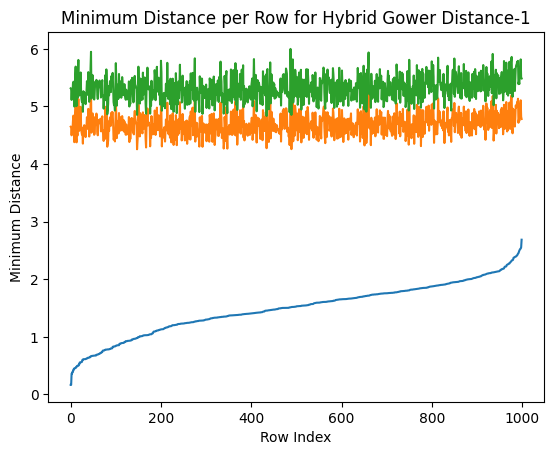

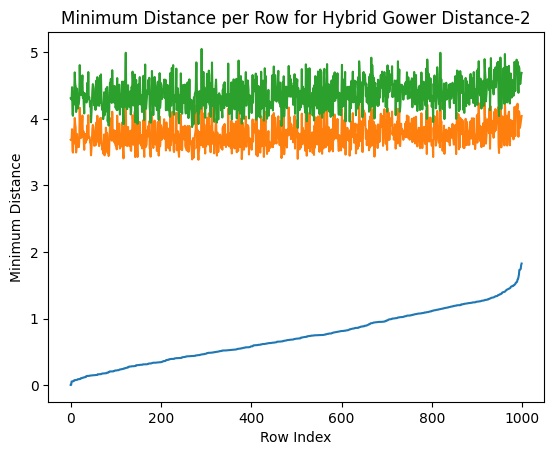

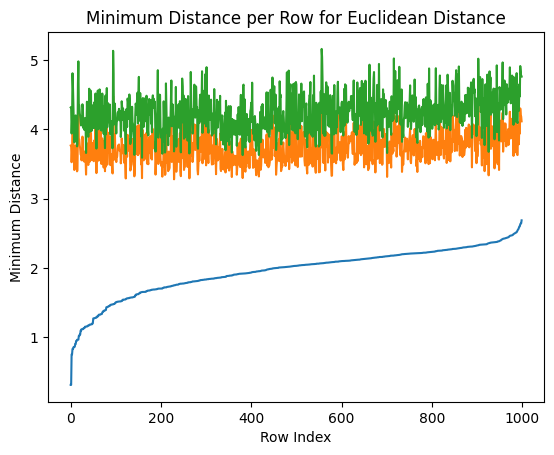

(array([[6.91725502, 4.45377203, 5.65954118, ..., 6.73713876, 5.66897969,
         4.73302134],
        [6.91725502, 5.63014965, 5.51858341, ..., 4.18011627, 5.0091449 ,
         6.66177077],
        [4.45377203, 5.63014965, 5.87243581, ..., 6.03104007, 5.88187432,
         4.42727329],
        ...,
        [6.73713876, 4.18011627, 6.03104007, ..., 5.66679757, 3.86662354,
         6.74252407],
        [5.66897969, 5.0091449 , 5.88187432, ..., 7.53342111, 3.86662354,
         6.10914761],
        [4.73302134, 6.66177077, 4.42727329, ..., 6.42258374, 6.74252407,
         6.10914761]]),
 array([[5.74389814, 3.7424328 , 4.66245637, ..., 5.77531235, 4.75757497,
         3.99083146],
        [5.74389814, 4.5045417 , 4.74942083, ..., 3.38278741, 4.35422438,
         5.60252978],
        [3.7424328 , 4.5045417 , 4.88347375, ..., 4.92829074, 4.90455088,
         3.34916387],
        ...,
        [5.77531235, 3.38278741, 4.92829074, ..., 4.85143892, 2.93909196,
         5.83060006],
        [4.7

In [32]:
compute_distance_and_plot(df_small,categorical_columns=categorical_columns)

In [7]:
from ctab_xtra_dp import evaluation

In [8]:
train, test = evaluation.split_data(df, 0.2, "income",random_state=22)

fake = pd.read_csv('../data_generation/synthetic_data/adult_target_epochs_100_epsilon_None.csv')

sample_percentage = 0.1

train_sample = train.sample(frac=sample_percentage, random_state=22)
fake_sample = fake.sample(frac=sample_percentage, random_state=22)

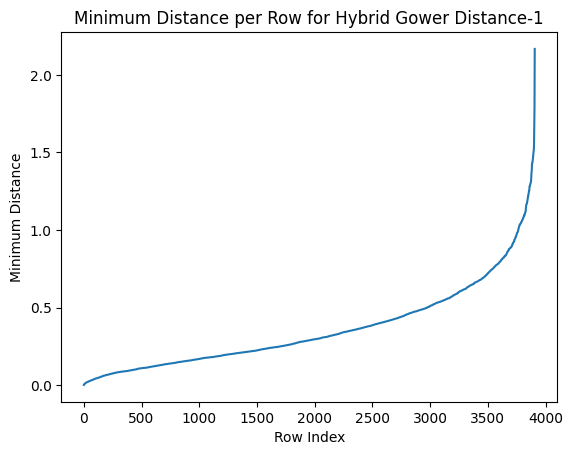

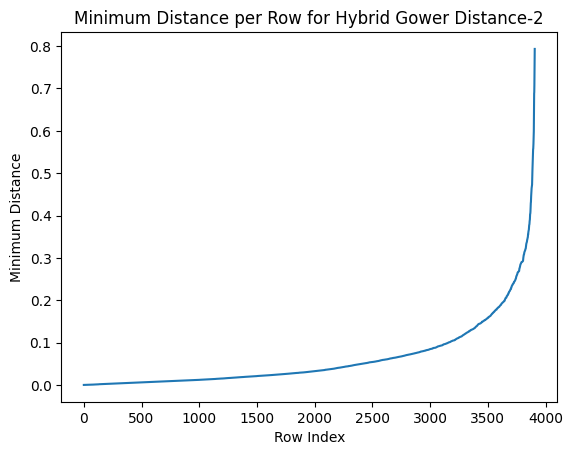

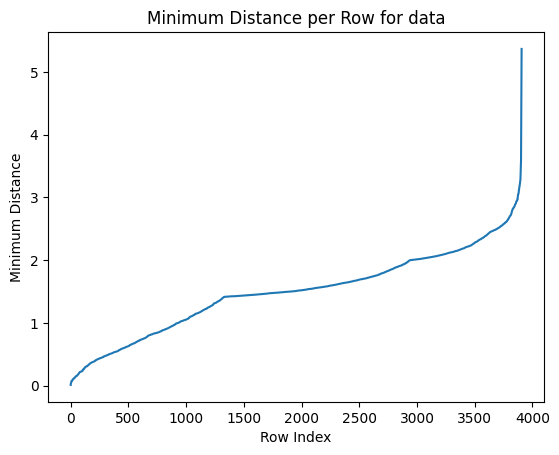

(array([[3.3339856 , 3.07555522, 4.35685521, ..., 2.07458701, 3.0464583 ,
         2.68583951],
        [2.25820832, 1.22586061, 0.91232787, ..., 1.78603768, 2.54436836,
         2.6008453 ],
        [2.53072886, 3.91979819, 4.22829575, ..., 3.21425201, 3.42274708,
         2.94832216],
        ...,
        [4.00872368, 3.52630394, 4.8277039 , ..., 2.68598722, 1.91910479,
         3.21740524],
        [3.58524135, 2.83683542, 4.36769189, ..., 1.97574689, 3.63339034,
         3.73202606],
        [1.88502051, 3.53761538, 2.16201955, ..., 2.02895071, 1.79618321,
         1.52299834]]),
 array([[2.23790095, 1.97651086, 2.73645479, ..., 0.85057347, 1.52406898,
         1.47799197],
        [1.30802789, 0.25380553, 0.257305  , ..., 1.13802779, 1.42641838,
         1.37240977],
        [1.4044279 , 2.41438748, 2.714684  , ..., 1.61772544, 1.80976914,
         1.48534164],
        ...,
        [2.90263535, 2.51071849, 3.81855022, ..., 1.21347342, 1.28380797,
         2.36530031],
        [2.4

In [9]:
compute_distance_and_plot(train_sample,fake_sample,categorical_columns)